In [7]:
using JSON
using DataStructures
using Plots
using WebIO
using Interact
using LinearAlgebra
plotlyjs()
theme(:juno)

# Functions

In [43]:
function remove_periodic_boundary!(array,mini::Integer,maxi::Integer)
    N=length(array)
    shift=maxi-mini+1
    prev=array[1]
    for k in 2:N
        next=array[k]
        
        #enter box to the left
        if prev==mini && next==maxi
            array[k:end].-=shift
            mini-=shift
            maxi-=shift
        #enter box to the right
        elseif prev==maxi && next==mini
            array[k:end].+=shift
            mini+=shift
            maxi+=shift
        end
            
        prev=array[k]
    end
    
    return array
end    



function parse_coords(coords)
    k=0
    x=Int32.(zeros(length(coords)))
    y=Int32.(zeros(length(coords)))
    for co in coords
        k+=1
        ii=0
        sym='Σ'
        str=""
        while sym != '_'
            ii+=1
            sym=co[ii]
            str*=sym
        end
        x[k]=parse(Int32,str[1:end-1])
        str=""
        while sym != '-'
            ii+=1
            sym=co[ii]
            str*=sym
        end
        y[k]=parse(Int32,str[1:end-1])
    end
    return (x,y)
end

remove_periodic_boundary! (generic function with 1 method)

# read data

In [64]:
file="0.drt_trajectories_300vehicles.json"

#ssd-ubuntu
path="../../Downloads/DrtShare/"

#friedman
path="../../RawData/MatSim/"

dat=JSON.parsefile(path*file; dicttype=OrderedDict, inttype=Int64, use_mmap=true);

# MSD analysis

In [65]:
K=300
N=3500
mini=0
maxi=100

s=1:N-1
R2=zeros(N)
Z=0
for bus in 1:K
    dic=collect(dat)[bus][2];
    coords_string=collect(values(dic))
    try
        x,y=parse_coords(coords_string)
        Z+=1
    catch
        continue
    end
    remove_periodic_boundary!(x,mini,maxi);
    remove_periodic_boundary!(y,mini,maxi);
    #s=contour_length(x,y)
    
    R=[x.-x[1] y.-y[1]]
    for n in 1:N
        R2[n]+=norm(R[n,:])^2
    end
end

R2./=Z;

In [66]:
R2_300=R2;

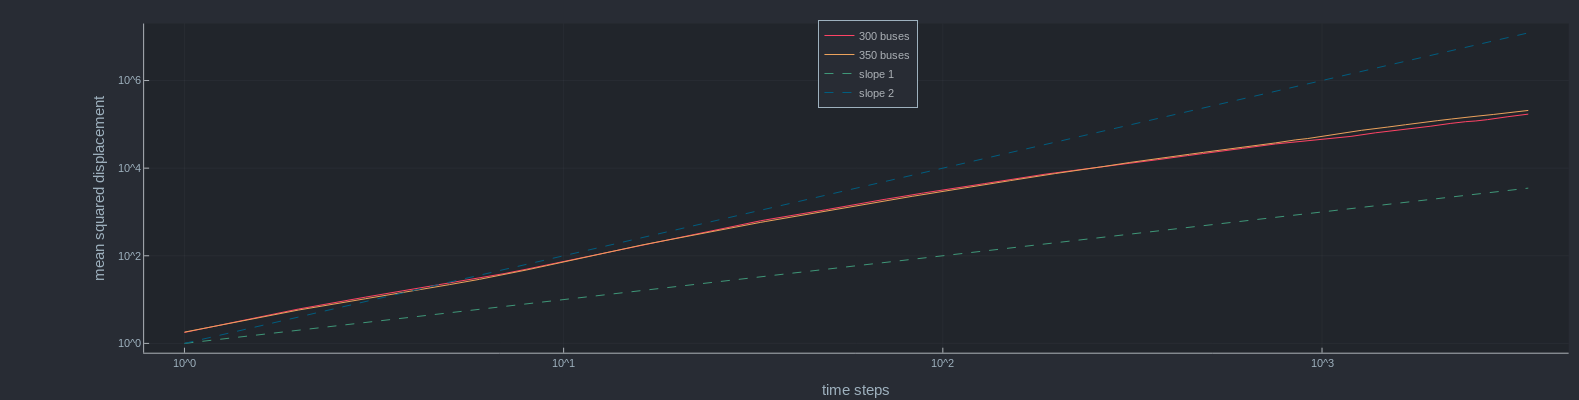

In [70]:
plot(s,R2_300[2:end],xlim=[1,N],ylim=[1,N^2],legend=:top,xlab="time steps",ylab="mean squared displacement",lab="300 buses")
plot!(s,R2_350[2:end],xlim=[1,N],ylim=[1,N^2],legend=:top,lab="350 buses")
plot!(s,s,lab="slope 1",linestyle=:dash)
plot!(s,s.^2,lab="slope 2",linestyle=:dash)
xaxis!(:log);yaxis!(:log)

In [71]:
savefig("MatSim_bus_MSD.html")

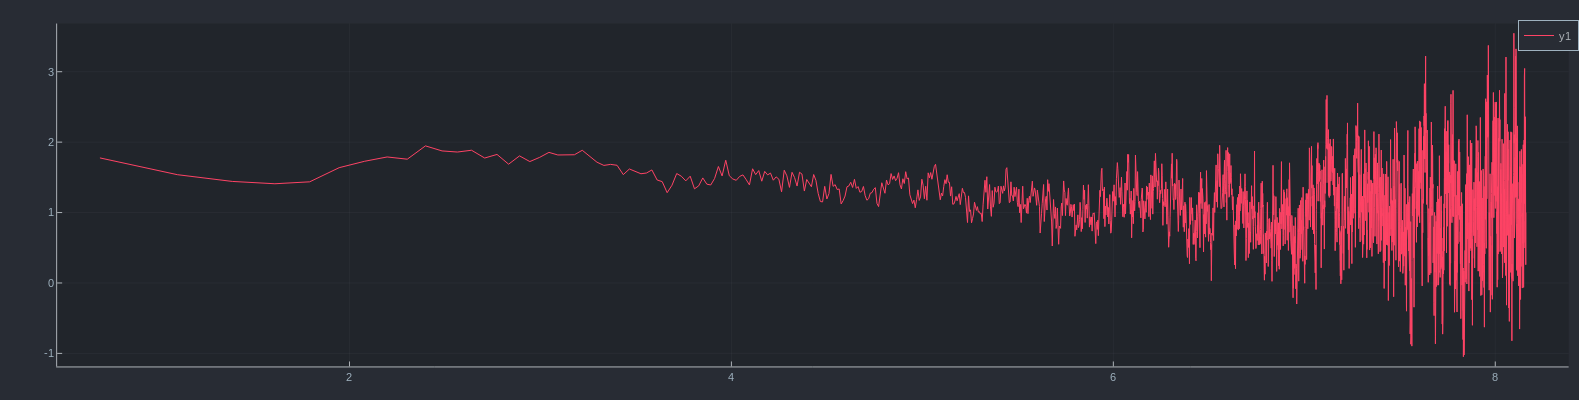

In [179]:
kk=1
Xlog=log.(s_300)
Ylog=log.(R2_300)[2:end]
slope=(Ylog[1+kk:end]-Ylog[1:end-kk])./(Xlog[1+kk:end]-Xlog[1:end-kk])
plot(Xlog[1+kk:end],slope)

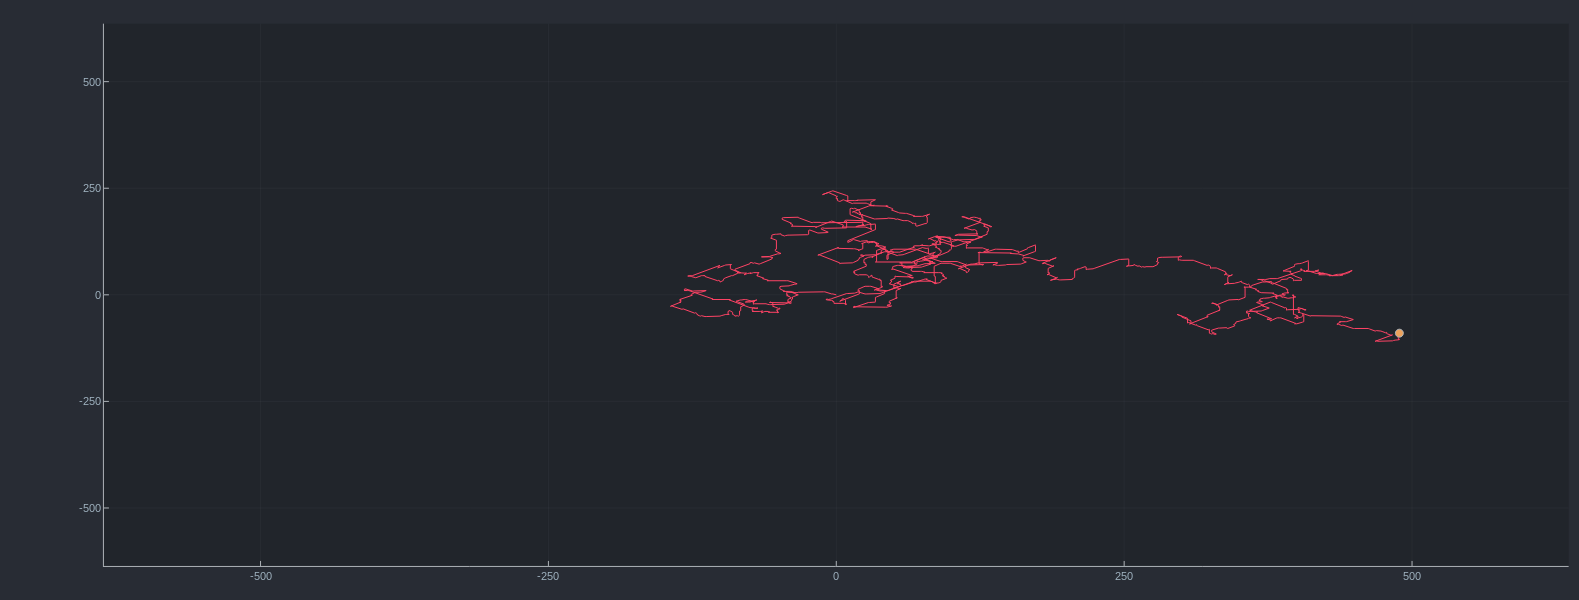

In [81]:
bus=4
dic=collect(dat)[bus][2];
coords_string=collect(values(dic))
x,y=parse_coords(coords_string)

remove_periodic_boundary!(x,mini,maxi);
remove_periodic_boundary!(y,mini,maxi);

boxes=6
x.-=x[1]
y.-=y[1]
plot(x,y,size=[600,600],xlim=boxes*[-maxi,maxi],ylim=boxes*[-maxi,maxi],legend=:none)
plot!([x[end]],[y[end]],seriestype=:scatter)

In [82]:
savefig("MatSim_example_trajectory.html")

In [5]:
LENGTH=100
gr()
@manipulate for i in 1:5000
plot(x[i:i+LENGTH],y[i:i+LENGTH],size=[600,600],xlim=[1,100],ylim=[1,100])
plot!([x[i+LENGTH+1]],[y[i+LENGTH+1]],marker=:hex)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 5000,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
2500, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/steffen/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/steffen/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/steffen/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/home/steffen/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/home/steffen/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fcd5461e230, Task (runnable) @0x00007fcd5461e230), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"3